## Employee dataset

### Objectives:
1. Load the data into the pandas environment and identify some basic details of the dataset.
2. Reset the index as "name" as the index.
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10. Do the standard scaling on the feature performance score.

### Importing relevant libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

### 1. Loading the dataset and basic analysis

### 2. Using name column as index

In [120]:
df = pd.read_csv('Data/employee.csv', index_col='name')
df.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Allen Smith to Leo Duck
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                7 non-null      float64
 1   income             7 non-null      float64
 2   gender             7 non-null      object 
 3   department         9 non-null      object 
 4   grade              9 non-null      object 
 5   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 504.0+ bytes


In [121]:
df.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [8]:
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


#### Insights:
- The dataset contains 6 features and 9 rows
- There are 6 NAN values in age, income and gender columns

### 3. Rows containing names 'Jack Morgan' & 'Josh Wills'

In [10]:
df.loc[['Jack Morgan', 'Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4. Data for values 'sales' & 'finance'

In [13]:
df.loc[(df['department'] == 'Sales') ^ (df['department'] == 'Finance')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5. Employees having performance score above 700

In [14]:
df.loc[df['performance_score'] > 700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 6. Employees having performance score between 500 & 700

In [85]:
df.loc[(df['performance_score'] > 500) & (df['performance_score'] < 700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,45.0,62000.0,F,Sales,G3,649


### 7. Handling missing values

In [16]:
df.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [122]:
def null_fill(data, strategy):
    data.fillna(strategy, inplace=True)

In [123]:
df['income'].median()

52000.0

In [124]:
df['gender'].mode()

0    F
dtype: object

In [125]:
null_fill(df['income'], df['income'].median())

In [127]:
null_fill(df['gender'], df['gender'].mode()[0])

In [129]:
null_fill(df['age'], df['age'].median())

In [130]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


#### Comments:
- The age, income, and gender columns had null values
- we define a function null_fill to fill missing values
- The age and income columns are filled using the median of the columns
- The gender column is filled using mode

### 8. Checking and handling outliers

<AxesSubplot:>

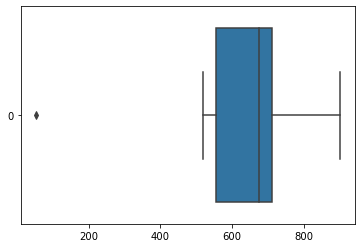

In [132]:
sns.boxplot(data=df['performance_score'], orient='h')

In [77]:
q3 = df['performance_score'].quantile(0.75)

In [78]:
q1 = df['performance_score'].quantile(0.25)

In [79]:
iqr = q3 - q1

In [80]:
q_limit = 1.5 * iqr

In [81]:
upper_limit = q3 + q_limit
lower_limit = q1 - q_limit

In [136]:
print('The upper limit for performace score is: ' ,upper_limit)
print('\nThe lower limit for performance score is: ', lower_limit)

The upper limit for performace score is:  943.5

The lower limit for performance score is:  323.5


In [137]:
df.loc[(df['performance_score'] < lower_limit) ^ (df['performance_score'] > upper_limit)]

,age,income,gender,department,grade,performance_score
name,,,,,,
James Authur,54.0,52000.0,F,Operations,G3,53


The only outlier is James Authur with a performance score of 53 which we can drop

In [138]:
df.drop(index = df.loc[(df['performance_score'] < lower_limit) ^ (df['performance_score'] > upper_limit)].index, inplace = True)

In [139]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 9. One-hot encoding for column: gender

In [140]:
df['gender'].value_counts()

F    6
M    2
Name: gender, dtype: int64

In [96]:
pd.get_dummies(data=df, columns=['gender'])

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,1,0
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,1,0
Josh Wills,54.0,52000.0,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1


### 10. Standardization of feature: performance score

In [141]:
df['performance_score'].describe()

count      8.00000
mean     680.37500
std      116.16729
min      520.00000
25%      625.75000
50%      691.50000
75%      714.00000
max      901.00000
Name: performance_score, dtype: float64

In [142]:
X = df['performance_score'].values.reshape(-1, 1)

Reshaping the feature into an array of shape (-1, 1)

In [144]:
standardization = StandardScaler()

In [145]:
scaled_x = standardization.fit_transform(X)

In [146]:
performace_score = pd.DataFrame(scaled_x)

In [119]:
performace_score.describe()

,0
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00
